In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given corner coordinates (bounding polygon)
corner_coordinates = np.array([
    (706661.2403, 4177700.6006),
    (670792.3126, 4161458.1677),
    (675581.9253, 4150881.0410),
    (711450.8529, 4167123.4739)
])

# Compute edges from the polygon
edges = list(zip(corner_coordinates, np.roll(corner_coordinates, shift=-1, axis=0)))

# Wind turbine coordinates
turbine_coordinates = np.array([
    (682875, 4159363), (690246, 4160133), (694145, 4161630), (696998, 4164218), (683890, 4160176), (686362, 4161406), (696543, 4163842), (682761, 4157905), (696391, 4163601), (683379, 4159001), (681263, 4156545), (683520, 4158362), (684374, 4159699), (687760, 4162095), (698306, 4164886), (688244, 4160207), (697773, 4164600), (690098, 4160677), (683708, 4158584), (689574, 4161503), (685422, 4160546), (693865, 4161501), (686698, 4160768), (687014, 4161688), (682027, 4156330), (677616, 4154610), (674994, 4153752), (683614, 4159115), (696762, 4164050), (698025, 4164712), (687619, 4160590), (682741, 4157012), (684804, 4160405), (688734, 4160462), (687316, 4161933), (695762, 4163056), (693376, 4161068), (687841, 4160838), (682150, 4156340), (689628, 4161812), (688667, 4161920), (694746, 4161983), (681693, 4157304), (686127, 4160344), (682445, 4156716), (680792, 4156968), (687310, 4161134), (681565, 4156726), (675672, 4154325), (693601, 4161366), (697469, 4164521), (685899, 4160223), (695375, 4162579), (694454, 4161793), (694959, 4162292), (688465, 4160375), (689030, 4160603), (687028, 4160936), (689588, 4160287), (691617, 4161685), (681699, 4157250), (683843, 4159363), (686759, 4161688), (685307, 4159881), (681101, 4157022), (685697, 4160062), (677777, 4154625), (684125, 4159565), (684689, 4159773), (675278, 4153855), (690985, 4160724), (697211, 4164415), (685832, 4160768), (689070, 4160939), (687444, 4161517), (693115, 4161068), (691509, 4161268), (696195, 4163393), (691408, 4160926), (688739, 4162276), (679576, 4156457), (688398, 4161006), (681431, 4157250), (682830, 4158114), (690723, 4160697), (683352, 4159760), (680530, 4156659), (681935, 4156777), (688815, 4162525), (692833, 4160966), (680161, 4156605), (688613, 4161920), (675545, 4154039), (686383, 4160579), (683137, 4159585), (682949, 4158806), (681975, 4157391), (695948, 4163258), (695594, 4162837), (683117, 4157371), (683319, 4158134), (679858, 4156612), (689903, 4160462), (692504, 4160831), (688633, 4161248), (675950, 4154453), (680759, 4156189), (683688, 4159820), (682902, 4157361), (684918, 4159901)
])

# Wind turbine and bird flight parameters
rotor_radius = 45  # meters
rotor_min_height = 35  # meters
rotor_max_height = 125  # meters
bird_wingspan = 1.74 # meters

# Bird flight parameters
min_flight_height = 2  # meters
max_flight_height = 50 # meters
num_simulations = 10000

collisions = 0

for _ in range(num_simulations):
    # Select a random entry edge
    entry_edge_idx = np.random.randint(len(edges))
    (x1, y1), (x2, y2) = edges[entry_edge_idx]

    # Generate a random entry point along this edge
    t_entry = np.random.uniform(0, 1)
    x_start = x1 + t_entry * (x2 - x1)
    y_start = y1 + t_entry * (y2 - y1)

    # Select a different edge for exit
    exit_edge_idx = (entry_edge_idx + np.random.randint(1, len(edges))) % len(edges)
    (x1_exit, y1_exit), (x2_exit, y2_exit) = edges[exit_edge_idx]

    # Generate a random exit point along the exit edge
    t_exit = np.random.uniform(0, 1)
    x_end = x1_exit + t_exit * (x2_exit - x1_exit)
    y_end = y1_exit + t_exit * (y2_exit - y1_exit)

    # Compute flight angle based on entry and exit points
    flight_angle = np.degrees(np.arctan2(y_end - y_start, x_end - x_start))

    # Assign random flight height
    flight_height = np.random.uniform(min_flight_height, max_flight_height)

    # Compute horizontal trajectory
    trajectory_slope = np.tan(np.radians(flight_angle))
    trajectory_intercept = y_start - trajectory_slope * x_start

    # Check for collision with each turbine (including bird wingspan in calculation)
    for tx, ty in turbine_coordinates:
        y_at_turbine = trajectory_slope * tx + trajectory_intercept

        # Check if the bird's wingspan overlaps the rotor area
        if (ty - rotor_radius - bird_wingspan / 2) <= y_at_turbine <= (ty + rotor_radius + bird_wingspan / 2):
            if rotor_min_height <= flight_height <= rotor_max_height:
                collisions += 1
                break  # Only count one collision per flight

# Compute collision probability
collision_probability = collisions / num_simulations

# Print results
print(f"Total Simulations: {num_simulations}")
print(f"Collisions: {collisions}")
print(f"Collision Probability: {collision_probability:.4f}")

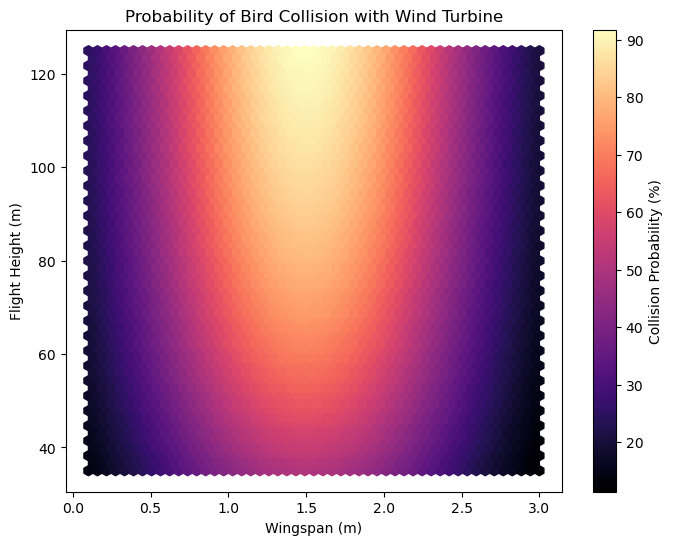

In [206]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
wingspan_values = np.linspace(0.1, 3.0, 100)  # Wingspan from 0.1m to 3.0m
flight_heights = np.linspace(35, 125, 100)  # Flight height from 35m to 125m

# Create a meshgrid
W, H = np.meshgrid(wingspan_values, flight_heights)

# Simulated collision probability function
collision_prob = np.exp(-((W - 1.5) ** 2) / 1.5) * (1 - np.exp(-H / 50)) * 100

# Plot heatmap
plt.figure(figsize=(8, 6))
hb = plt.hexbin(W.flatten(), H.flatten(), C=collision_prob.flatten(), gridsize=50, cmap="magma", reduce_C_function=np.mean)

# Add color bar
cb = plt.colorbar(hb)
cb.set_label("Collision Probability (%)")

# Labels and title
plt.xlabel("Wingspan (m)")
plt.ylabel("Flight Height (m)")
plt.title("Probability of Bird Collision with Wind Turbine")

# Show plot
plt.show()
